<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/bt_cnn_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Nhận dạng **khuôn mặt:**
https://drive.google.com/drive/folders/1M24uPWi3cvNaBdl0DCIkGRDsCh-Op1h6?usp=sharing

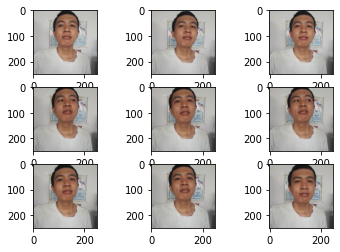

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras import datasets, Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image
import numpy as np
import os

folder= '/content/drive/MyDrive/NhanDangKhuonMat/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanAnhTuan'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanAnhTuan'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanPhuocTho'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanTienDat'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
    
photos = asarray(photos)
photos = photos.reshape(58,150,150,3)
labels = asarray(labels)
labels = np_utils.to_categorical(labels)
print(photos.shape,labels.shape)

(58, 150, 150, 3) (58, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(photos, labels, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40, 150, 150, 3)
(18, 150, 150, 3)
(40, 3)
(18, 3)


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 50, verbose=2)

Epoch 1/50
2/2 - 3s - loss: 14.0558 - accuracy: 0.3750 - val_loss: 1243.2407 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 2/50
2/2 - 2s - loss: 864.9268 - accuracy: 0.3500 - val_loss: 90.1786 - val_accuracy: 0.3333 - 2s/epoch - 831ms/step
Epoch 3/50
2/2 - 2s - loss: 46.1051 - accuracy: 0.3500 - val_loss: 8.4317 - val_accuracy: 0.6667 - 2s/epoch - 829ms/step
Epoch 4/50
2/2 - 2s - loss: 8.9398 - accuracy: 0.5500 - val_loss: 2.1774 - val_accuracy: 0.6667 - 2s/epoch - 813ms/step
Epoch 5/50
2/2 - 2s - loss: 2.0908 - accuracy: 0.6750 - val_loss: 3.7246 - val_accuracy: 0.5556 - 2s/epoch - 817ms/step
Epoch 6/50
2/2 - 2s - loss: 2.1897 - accuracy: 0.7250 - val_loss: 0.0720 - val_accuracy: 1.0000 - 2s/epoch - 812ms/step
Epoch 7/50
2/2 - 2s - loss: 0.2047 - accuracy: 0.8750 - val_loss: 0.1153 - val_accuracy: 1.0000 - 2s/epoch - 817ms/step
Epoch 8/50
2/2 - 2s - loss: 0.0899 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 1.0000 - 2s/epoch - 912ms/step
Epoch 9/50
2/2 - 2s - loss: 0.0498 

In [ ]:
metric = model.evaluate(X_test, Y_test, verbose=2)
print('sai so:', metric[0])
print('do chinh xac:', metric[1])

1/1 - 0s - loss: 6.6227e-09 - accuracy: 1.0000 - 222ms/epoch - 222ms/step
sai so: 6.622737469541562e-09
do chinh xac: 1.0


Text(0.5, 0, 'So lan hoc')

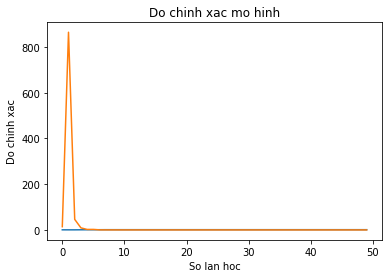

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Do chinh xac mo hinh')
plt.ylabel('Do chinh xac')
plt.xlabel('So lan hoc')

1/1 [==============================] - 0s 90ms/step
Đó là món: Bạn Tuấn


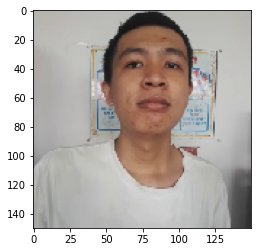

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanAnhTuan19.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Bạn Tuấn','Bạn Thọ','Bạn Đạt']
a = int(np.argmax(model.predict(pic), axis=1))
print('Đó là món:',classname[a])

1/1 [==============================] - 0s 33ms/step
Đó là món: Bạn Thọ


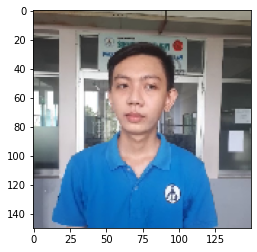

In [ ]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanPhuocTho1.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Bạn Tuấn','Bạn Thọ','Bạn Đạt']
a = int(np.argmax(model.predict(pic), axis=1))
print('Đó là món:',classname[a])

1/1 [==============================] - 0s 25ms/step
Đó là món: Bạn Đạt


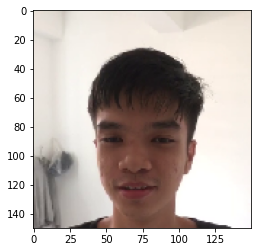

In [ ]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanTienDat2.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
classname=['Bạn Tuấn','Bạn Thọ','Bạn Đạt']
a = int(np.argmax(model.predict(pic), axis=1))
print('Đó là món:',classname[a])